<a href="https://colab.research.google.com/github/soumyarach/CSV-files/blob/main/analysis_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Create a dummy DataFrame
data = {'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-02', '2023-01-03'],
        'Product': ['A', 'B', 'A', 'C', 'B'],
        'Quantity': [10, 5, 8, 12, 6],
        'Price': [2.5, 10.0, 2.5, 5.0, 10.0]}

dummy_sales_df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
dummy_sales_df.to_csv('sales_data.csv', index=False)

print("Dummy 'sales_data.csv' created successfully.")

Dummy 'sales_data.csv' created successfully.


Revenue by Product:
  Product  Revenue
0       A     45.0
1       B    110.0
2       C     60.0

Revenue by Date:
        Date  Revenue
0 2023-01-01     75.0
1 2023-01-02     80.0
2 2023-01-03     60.0


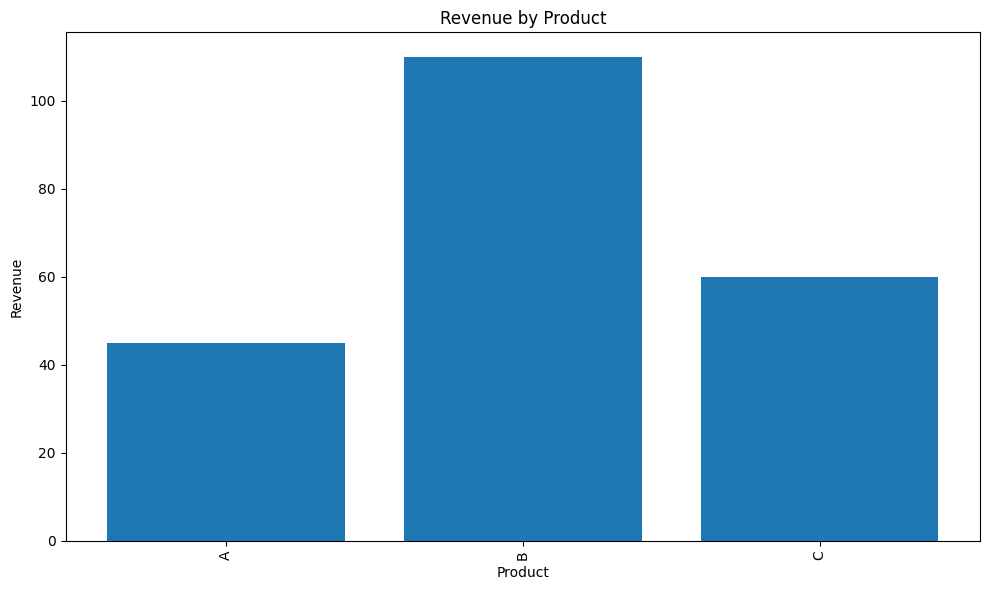

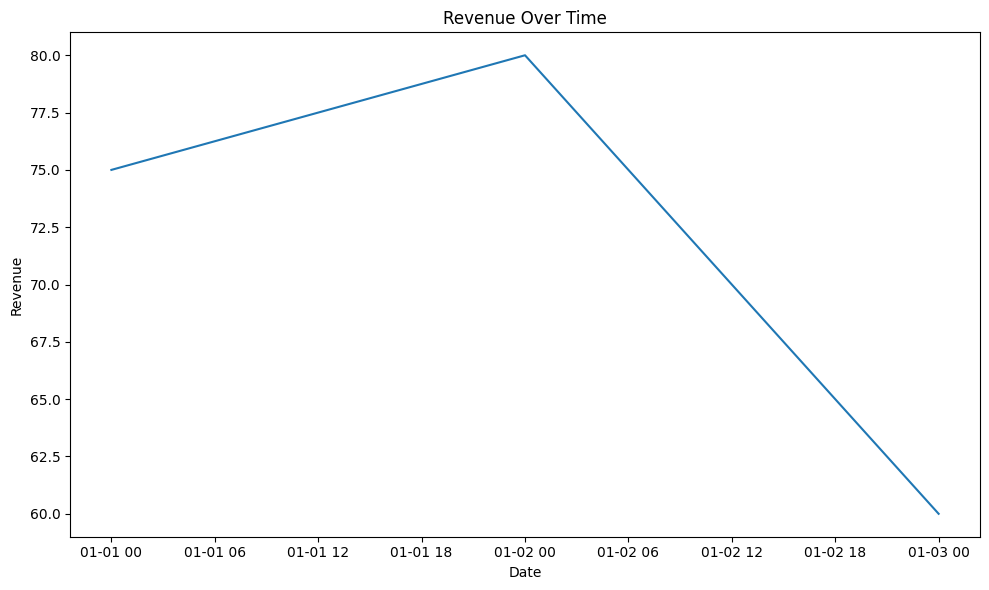

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data CSV file
def load_sales_data(file_path):
    try:
        sales_data = pd.read_csv(file_path)
        return sales_data
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

# Analyze sales data
def analyze_sales_data(sales_data):
    # Ensure 'Date' column is in datetime format
    sales_data['Date'] = pd.to_datetime(sales_data['Date'])

    # Calculate total revenue
    sales_data['Revenue'] = sales_data['Quantity'] * sales_data['Price']

    # Group by product and calculate total revenue
    revenue_by_product = sales_data.groupby('Product')['Revenue'].sum().reset_index()

    # Group by date and calculate total revenue
    revenue_by_date = sales_data.groupby('Date')['Revenue'].sum().reset_index()

    return revenue_by_product, revenue_by_date

# Plot sales data insights
def plot_sales_insights(revenue_by_product, revenue_by_date):
    # Plot revenue by product
    plt.figure(figsize=(10, 6))
    plt.bar(revenue_by_product['Product'], revenue_by_product['Revenue'])
    plt.title('Revenue by Product')
    plt.xlabel('Product')
    plt.ylabel('Revenue')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Plot revenue by date
    plt.figure(figsize=(10, 6))
    plt.plot(revenue_by_date['Date'], revenue_by_date['Revenue'])
    plt.title('Revenue Over Time')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.tight_layout()
    plt.show()

# Main function
def main():
    file_path = 'sales_data.csv'  # Update with your file path
    sales_data = load_sales_data(file_path)

    if sales_data is not None:
        revenue_by_product, revenue_by_date = analyze_sales_data(sales_data)
        print("Revenue by Product:")
        print(revenue_by_product)
        print("\nRevenue by Date:")
        print(revenue_by_date)
        plot_sales_insights(revenue_by_product, revenue_by_date)

if __name__ == "__main__":
    main()